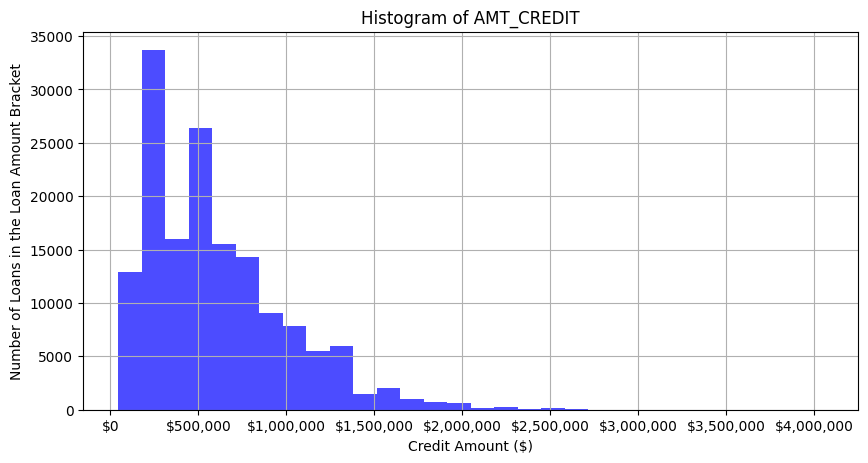

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load data from CSV file
data = pd.read_csv('train_data.csv')

if 'AMT_CREDIT' in data.columns:
    # Plotting the histogram for the 'AMT_CREDIT' column
    plt.figure(figsize=(10, 6))
    n, bins, patches = plt.hist(data['AMT_CREDIT'], bins=30, color='blue', alpha=0.7)
    plt.title('Histogram of AMT_CREDIT')
    plt.xlabel('Credit Amount ($)')
    plt.ylabel('Number of Loans in the Loan Amount Bracket')
    plt.grid(True)

    # Format the x-axis to show labels with dollar signs and commas for thousands
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
    plt.subplots_adjust(bottom=0.25)
    plt.show()


In [2]:
# JUSTIFICATION: 
# This histogram illustrates the distribution of loan amounts granted. 
# The 'AMT_CREDIT' variable is critical in predicting loan default 
# as larger loan amounts might correlate with a higher risk of default 
# due to increased financial burden on borrowers."

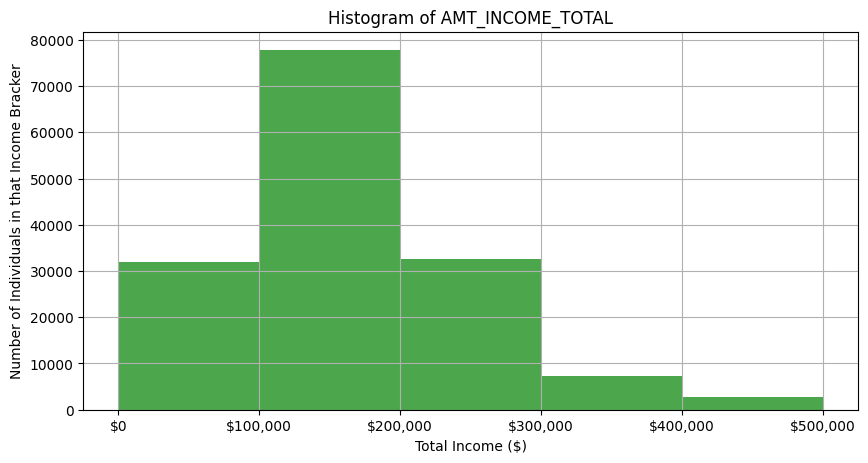

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load data from CSV file
data = pd.read_csv('train_data.csv')

if 'AMT_INCOME_TOTAL' in data.columns:
    # Plotting the histogram for the 'AMT_INCOME_TOTAL' column
    plt.figure(figsize=(10, 6))
    # Focus on a common range of incomes by setting range in plt.hist
    n, bins, patches = plt.hist(data['AMT_INCOME_TOTAL'], bins=5, range=(0, 500000), color='green', alpha=0.7)
    plt.title('Histogram of AMT_INCOME_TOTAL')
    plt.xlabel('Total Income ($)')
    plt.ylabel('Number of Individuals in that Income Bracket')
    plt.grid(True)

    # Format the x-axis to show labels with dollar signs and commas for thousands
    ax = plt.gca()
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${:,.0f}'.format(x)))
    plt.subplots_adjust(bottom=0.25)
    plt.show()


In [4]:
# JUSTIFICATION:
# This histogram focuses on total income amounts up to $500,000, divided into 5 income tiers. 
# By narrowing the range, we highlight the distribution among more typical income brackets, 
# which provides deeper insights into the financial profiles of most loan applicants and their associated default risks.
# Income is a significant predictor of default, larger incomes indicate increased ability to service debt. 

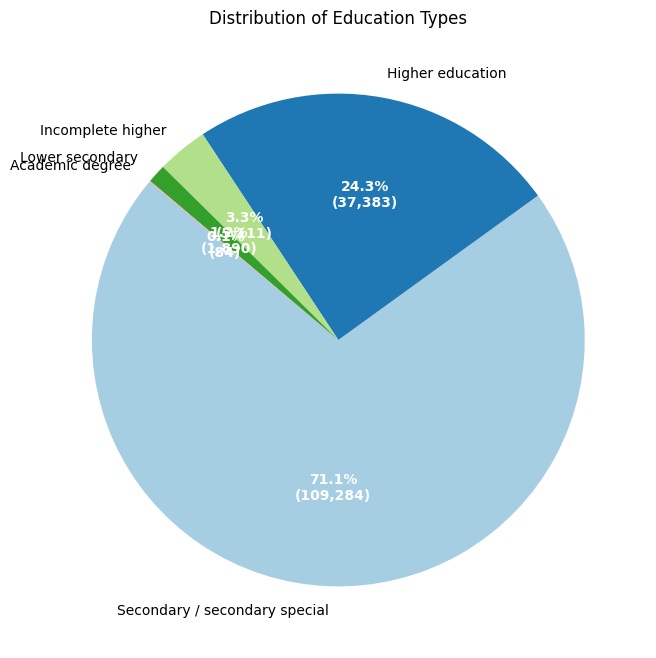

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('train_data.csv')

if 'NAME_EDUCATION_TYPE' in data.columns:
    # Count the occurrences of each education type
    education_counts = data['NAME_EDUCATION_TYPE'].value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(education_counts, labels=education_counts.index,
                                       autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*education_counts.sum()):,d})',
                                       startangle=140, colors=plt.cm.Paired(range(len(education_counts))))

    # Pie chart styling
    plt.title('Distribution of Education Types')

    # Make the labels better readable
    plt.setp(texts, size=10)
    plt.setp(autotexts, size=10, weight="bold", color="white")

    plt.show()


In [ ]:
# JUSTIFICATION: 
# Education level can be a strong predictor of loan default because it often correlates with 
# an individual's earning potential and financial literacy, influencing their ability to manage and repay debts.

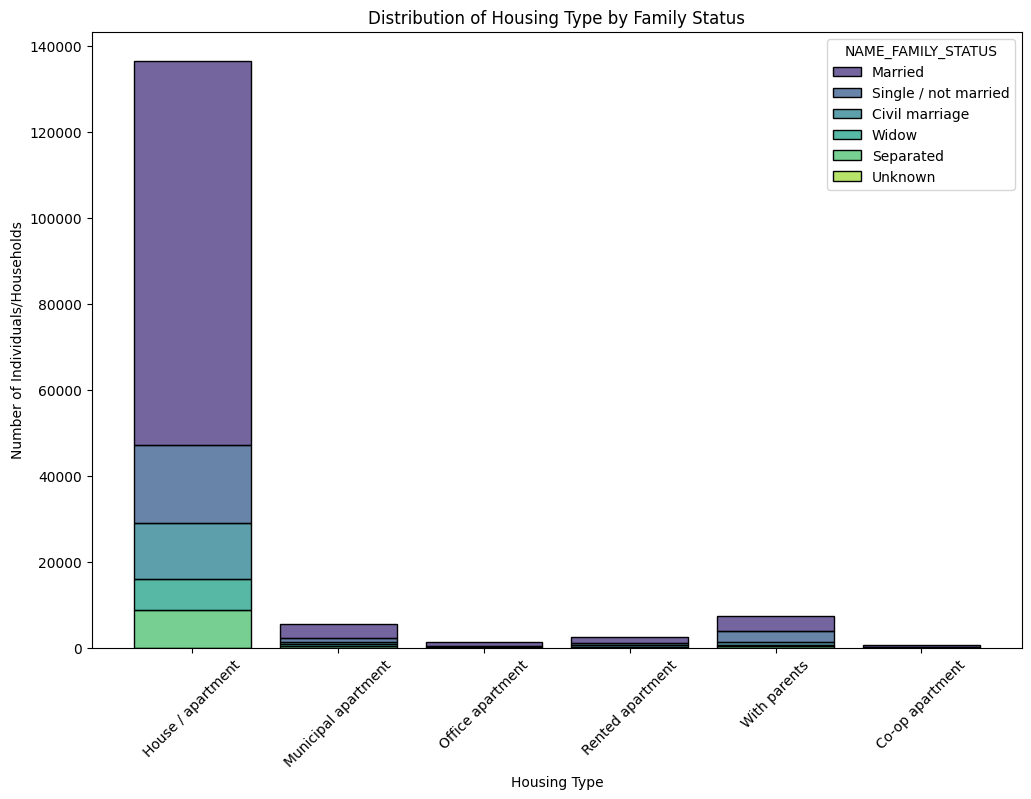

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('train_data.csv')

if 'NAME_FAMILY_STATUS' in data.columns and 'NAME_HOUSING_TYPE' in data.columns:
    plt.figure(figsize=(12, 8))

    # Create a stacked histogram with flipped axes
    sns.histplot(data=data, x='NAME_HOUSING_TYPE', hue='NAME_FAMILY_STATUS', multiple='stack', palette='viridis', shrink=0.8)

    # Adding labels and title
    plt.title('Distribution of Housing Type by Family Status')
    plt.xlabel('Housing Type')
    plt.ylabel('Number of Individuals/Households')
    plt.xticks(rotation=45)  # Rotate labels to prevent overlap

    plt.show()
else:
    missing_cols = []
    if 'NAME_FAMILY_STATUS' not in data.columns:
        missing_cols.append('NAME_FAMILY_STATUS')
    if 'NAME_HOUSING_TYPE' not in data.columns:
        missing_cols.append('NAME_HOUSING_TYPE')
    print(f"The following necessary columns do not exist in the CSV file: {', '.join(missing_cols)}")


In [ ]:
# JUSTIFICATION:
# The distribution of housing types within family statuses can predict loan defaults as it reveals 
# the financial stability and living conditions of borrowers, influencing their ability to repay loans.
# For example, families living in rented apartments might have different financial constraints and stability 
# compared to those owning their homes, potentially affecting their loan repayment behavior.

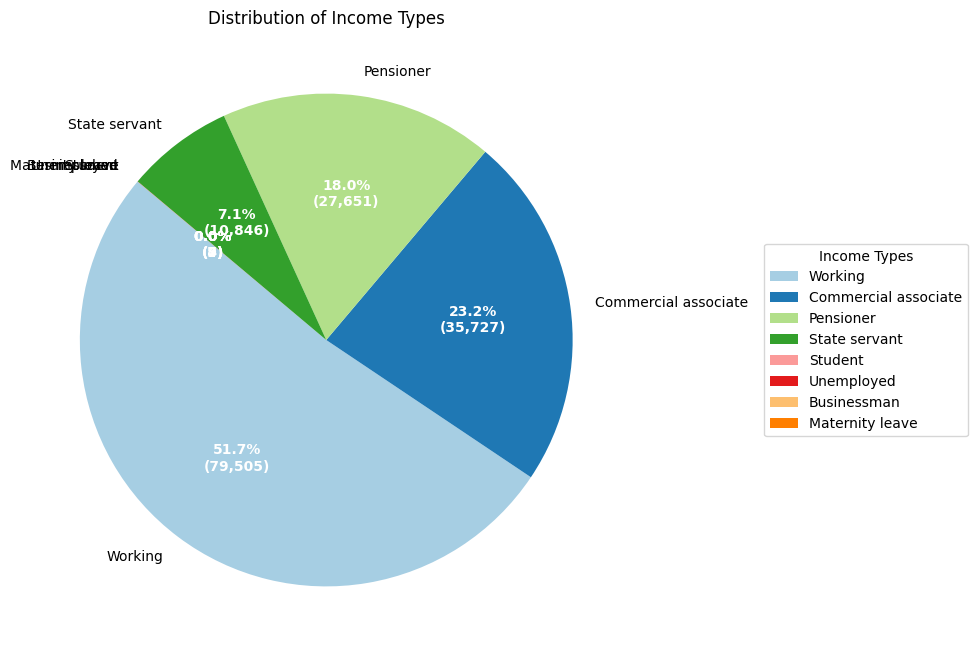

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('train_data.csv')

# Check if 'NAME_INCOME_TYPE' column exists
if 'NAME_INCOME_TYPE' in data.columns:
    # Count the occurrences of each income type
    income_counts = data['NAME_INCOME_TYPE'].value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(income_counts, labels=income_counts.index,
                                       autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*income_counts.sum()):,d})',
                                       startangle=140, colors=plt.cm.Paired(range(len(income_counts))))

    # Pie chart styling
    plt.title('Distribution of Income Types')

    # Make the labels better readable
    plt.setp(texts, size=10)
    plt.setp(autotexts, size=10, weight="bold", color="white")

    # Adding a legend further to the right of the pie chart
    plt.legend(wedges, income_counts.index, title="Income Types", loc="center left", bbox_to_anchor=(1.2, 0.5))

    plt.show()
else:
    print("The column 'NAME_INCOME_TYPE' does not exist in the CSV file.")


In [ ]:
# JUSTIFICATION: 
# The "NAME_INCOME_TYPE" category is a good predictor of loan default because it reflects the source and 
# stability of an applicant's income, crucial factors in their ability to consistently meet debt repayment obligations.

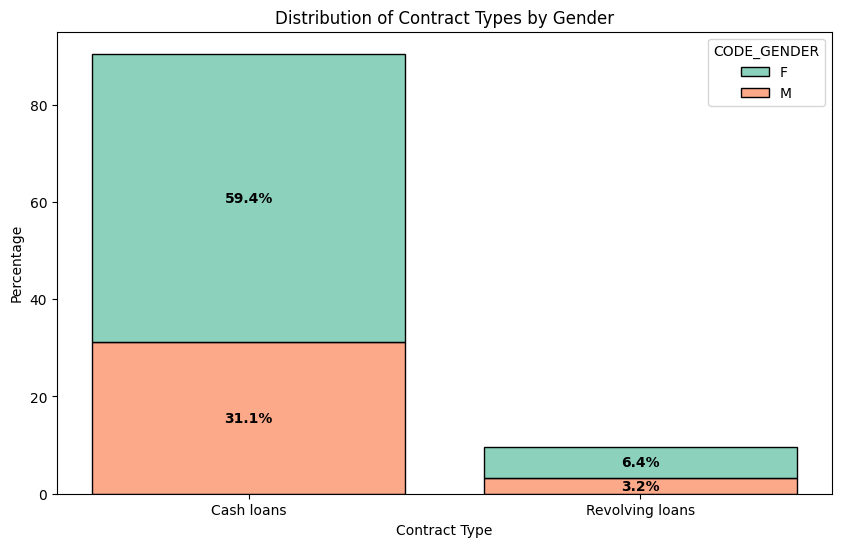

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('train_data.csv')

# Check if the necessary columns exist
if 'NAME_CONTRACT_TYPE' in data.columns and 'CODE_GENDER' in data.columns:
    # Adjust the figure size
    plt.figure(figsize=(10, 6))

    # Create a stacked histogram
    ax = sns.histplot(data=data, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', multiple='stack',
                      palette='Set2', shrink=0.8, stat='percent')

    # Adding labels and title
    plt.title('Distribution of Contract Types by Gender')
    plt.xlabel('Contract Type')
    plt.ylabel('Percentage')

    # Calculate percentages and add text annotations within each bar
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2
        ax.text(x, y, percentage, ha='center', va='center', color='black', fontweight='bold')

    plt.show()
else:
    missing_cols = []
    if 'NAME_CONTRACT_TYPE' not in data.columns:
        missing_cols.append('NAME_CONTRACT_TYPE')
    if 'CODE_GENDER' not in data.columns:
        missing_cols.append('CODE_GENDER')
    print(f"The following necessary columns do not exist in the CSV file: {', '.join(missing_cols)}")


In [ ]:
# JUSTIFICATION:
# The distribution of contract types can help predict loan default because different contract types 
# (e.g., revolving credit vs. cash loans) are associated with varying levels of financial risk and borrower behavior patterns.

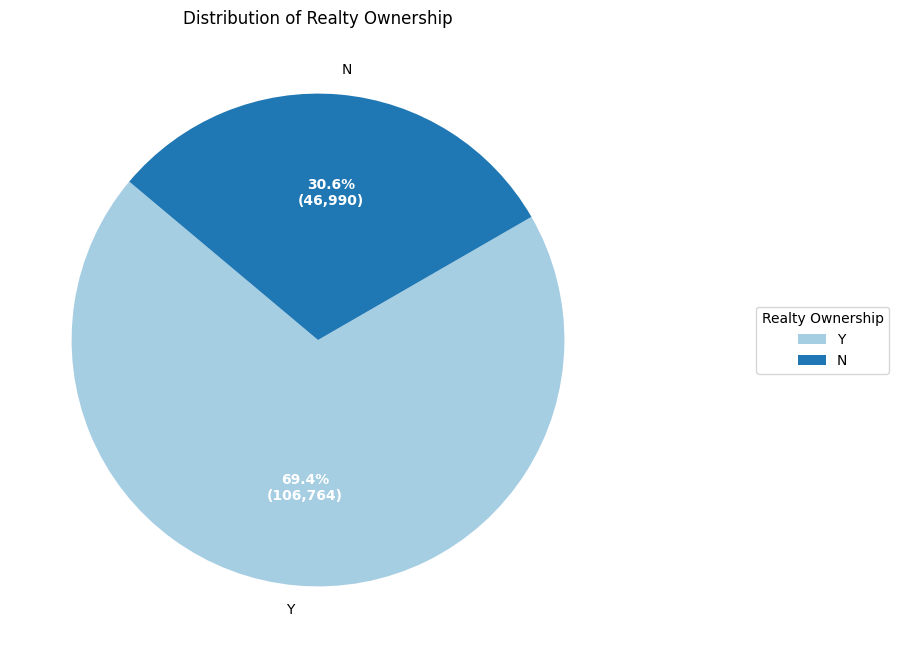

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('train_data.csv')

# Check if 'FLAG_OWN_REALTY' column exists
if 'FLAG_OWN_REALTY' in data.columns:
    # Count the occurrences of each realty ownership status
    realty_counts = data['FLAG_OWN_REALTY'].value_counts()

    # Plotting the pie chart
    plt.figure(figsize=(8, 8))
    wedges, texts, autotexts = plt.pie(realty_counts, labels=realty_counts.index,
                                       autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*realty_counts.sum()):,d})',
                                       startangle=140, colors=plt.cm.Paired(range(len(realty_counts))))

    # Pie chart styling
    plt.title('Distribution of Realty Ownership')

    # Make the labels better readable
    plt.setp(texts, size=10)
    plt.setp(autotexts, size=10, weight="bold", color="white")

    # Adding a legend further to the right of the pie chart
    plt.legend(wedges, realty_counts.index, title="Realty Ownership", loc="center left", bbox_to_anchor=(1.2, 0.5))

    plt.show()
else:
    print("The column 'FLAG_OWN_REALTY' does not exist in the CSV file.")


In [ ]:
# JUSTIFICATION: 
# Prior home ownership is a predictor of loan repayment or default because it often indicates financial stability and asset accumulation, 
# which are critical factors in a borrower's ability to meet loan obligations.

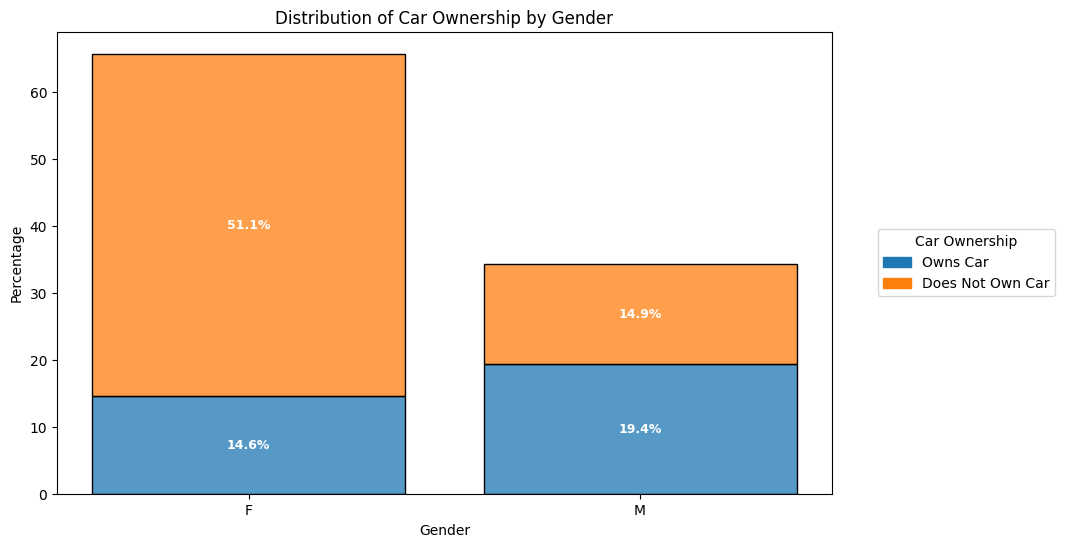

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
data = pd.read_csv('train_data.csv')

# Check if the necessary columns exist
if 'CODE_GENDER' in data.columns and 'FLAG_OWN_CAR' in data.columns:
    # Adjust the figure size
    plt.figure(figsize=(10, 6))

    # Define color palette
    palette = {"Y": "C0", "N": "C1"}

    # Create a stacked histogram
    ax = sns.histplot(data=data, x='CODE_GENDER', hue='FLAG_OWN_CAR', multiple='stack',
                      palette=palette, shrink=0.8, stat='percent')

    # Adding labels and title
    plt.title('Distribution of Car Ownership by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Percentage')

    # Calculate the total counts per group for annotations
    group_totals = data.groupby(['CODE_GENDER', 'FLAG_OWN_CAR']).size().unstack(fill_value=0)
    total_counts = group_totals.sum(axis=1)

    # Annotate percentages within each bar segment
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x = p.get_x()
        y = p.get_y()

        # Find the group and subgroup by coordinates
        group = ax.get_xticklabels()[int(x + width / 2)].get_text()
        subgroup = 'Y' if p.get_facecolor() == plt.get_cmap('tab10')(0) else 'N'

        # Calculate the percentage for each segment
        percentage = height

        # Annotation text
        annotation = f'{percentage:.1f}%'

        # Annotate each bar
        ax.text(x + width / 2, y + height / 2, annotation, ha='center', va='center', color='white', fontweight='bold', fontsize=9)

    # Create a custom legend
    from matplotlib.patches import Patch
    legend_labels = {'Y': 'Owns Car', 'N': 'Does Not Own Car'}
    handles = [Patch(color=palette[key], label=legend_labels[key]) for key in legend_labels]

    plt.legend(handles=handles, title="Car Ownership", loc="center left", bbox_to_anchor=(1.05, 0.5))

    plt.show()
else:
    missing_cols = []
    if 'CODE_GENDER' not in data.columns:
        missing_cols.append('CODE_GENDER')
    if 'FLAG_OWN_CAR' not in data.columns:
        missing_cols.append('FLAG_OWN_CAR')
    print(f"The following necessary columns do not exist in the CSV file: {', '.join(missing_cols)}")


In [ ]:
# JUSTIFICATION: 
# This visualization is informative for loan defaults because it highlights the correlation between gender, 
# car ownership, and potential financial stability, which are key factors in assessing the risk of defaulting on loans.